# House Pricing Prediction

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # For easier statistical plotting
sns.set_style("whitegrid")


In [2]:
import warnings
warnings. filterwarnings('ignore')

## Data Extraction

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
#checking the shape of the data
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
print(df_train.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [7]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

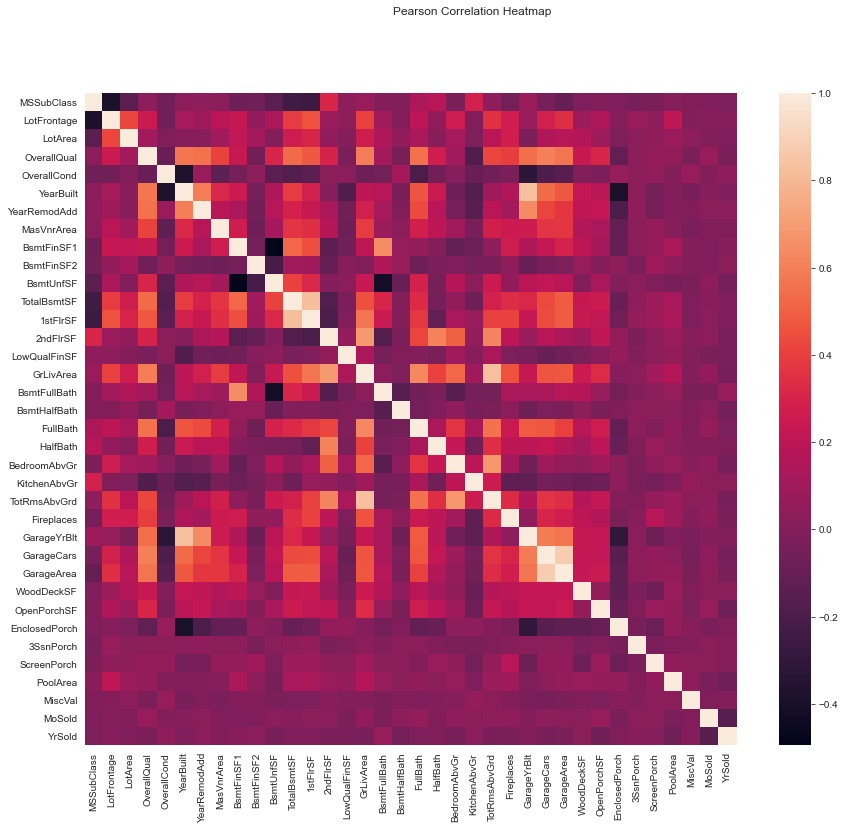

In [8]:
# check Pearson Correlation between the variable
pd.set_option('precision',2)
plt.figure(figsize=(15,12))
sns.heatmap(df_train.drop(["SalePrice","Id"],axis=1).corr(), square=True)
plt.suptitle("Pearson Correlation Heatmap")
plt.show()

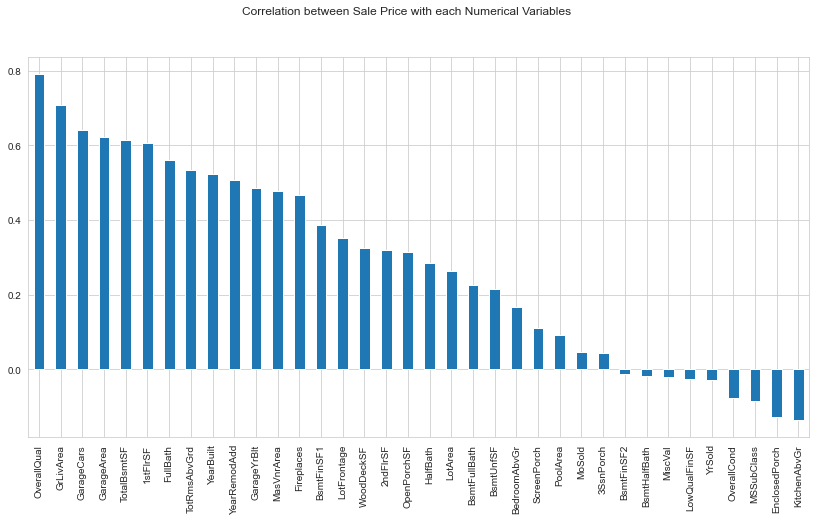

In [9]:
# check correlation between each variable and the targe (SalePrice)
corr_with_SalePrice = df_train.drop(["Id"], axis=1).corr()["SalePrice"].sort_values(ascending=False)
plt.figure(figsize=(14,7))
corr_with_SalePrice.drop("SalePrice").plot.bar()
plt.suptitle("Correlation between Sale Price with each Numerical Variables")
plt.show()

del corr_with_SalePrice

<Figure size 864x720 with 0 Axes>

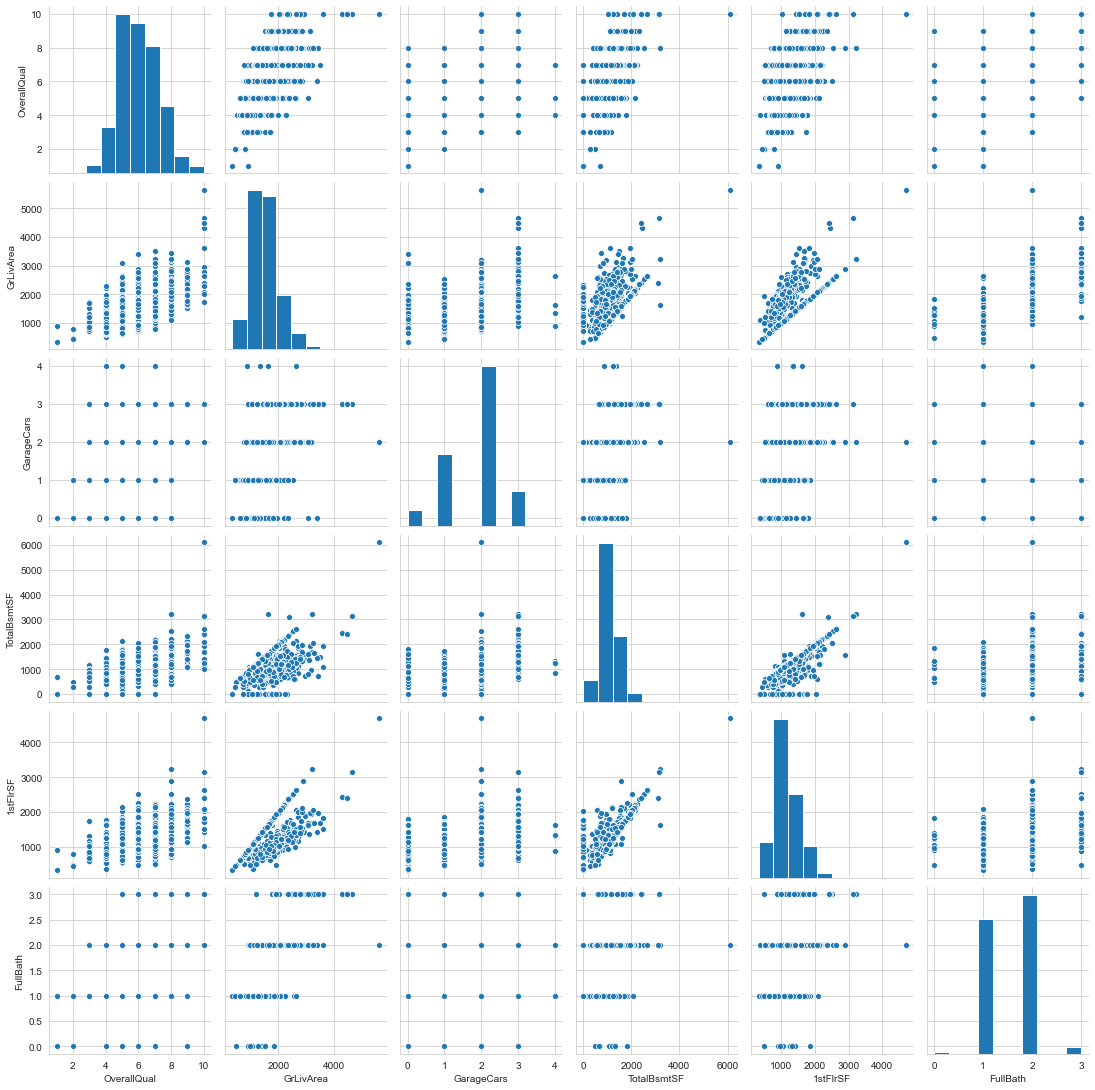

In [10]:
# Pair plot of the significant features
plt.figure(figsize=(12,10))
interesting_cols = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF" ,"1stFlrSF", "FullBath"]
sns.pairplot(df_train[interesting_cols], dropna=True)
plt.show()

del interesting_cols

<AxesSubplot:xlabel='SalePrice'>

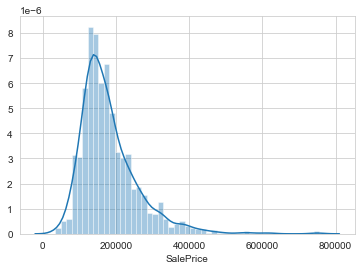

In [11]:
# Check distribution of the saleprice
sns.distplot(df_train['SalePrice'])

## Feature Engineering

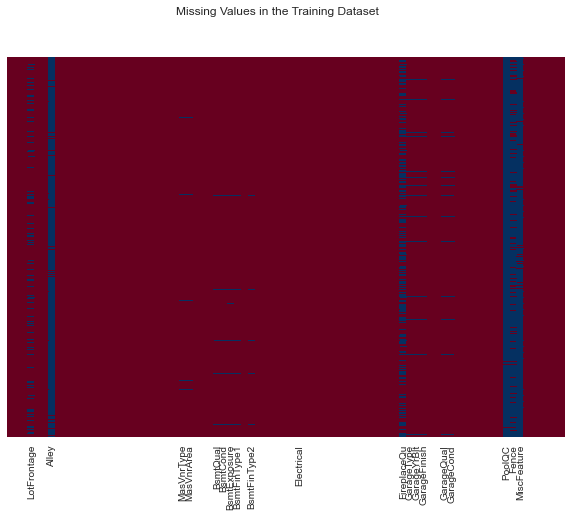

In [12]:
# Check missing values of each column
label_nas = []
for col in df_train.columns.tolist():
    if np.sum(df_train[col].isnull() ) != 0:
        label_nas.append(col)
    else:
        label_nas.append("")

plt.figure(figsize=(10,7))
plt.suptitle('Missing Values in the Training Dataset')
sns.heatmap(df_train.isnull(),yticklabels=False, xticklabels=label_nas ,cbar = False, cmap='RdBu')
plt.show()

In [13]:
null_values_per_col = np.sum(df_train.drop(["Id","SalePrice"], axis=1).isnull(), axis=0)
print("Null values per columns")
print(null_values_per_col)
df_train.drop(['Alley','PoolQC','Fence', 'MiscFeature'], axis=1, inplace=True)
df_test.drop(['Alley','PoolQC','Fence', 'MiscFeature'], axis=1, inplace=True)
df_train.shape
df_test.shape

Null values per columns
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64


(1459, 76)

In [14]:
# Check features that need imputation for the missing value
null_values_per_col = np.sum(df_train.drop(["Id","SalePrice"], axis=1).isnull(), axis=0)
print(r"There are %d"  %np.sum(null_values_per_col != 0)  + " columns to impute.\n")

cols_to_impute = []
for col_index, val in null_values_per_col.items():
    if val != 0: cols_to_impute.append(col_index)

print(r"The columns to impute are:")        
for column in cols_to_impute:
    print(column)                 

There are 15 columns to impute.

The columns to impute are:
LotFrontage
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond


In [15]:
# Imputation of the missing values by using median for numerical features and modus for categorical feature
imputation_val_for_na_cols = dict()
for col in cols_to_impute:
    if (df_train[col].dtype == 'float64' ) or  (df_train[col].dtype == 'int64'):
        imputation_val_for_na_cols[col] = np.nanmedian(df_train[col])
    else:
        imputation_val_for_na_cols[col] = df_train[col].value_counts().argmax()

for key, val in imputation_val_for_na_cols.items():
    df_train[key].fillna(value= val, inplace = True)
    df_test[key].fillna(value = val, inplace = True)

print("Checking if everything went well ...")    
print("Number of missing values in training set after imputation and cleaning ",
          np.sum(np.sum(df_train.isnull())))    
print("Number of missing values in test set after imputation and cleaning " ,
      np.sum( np.sum(df_test.isnull())) )

del imputation_val_for_na_cols, cols_to_impute

Checking if everything went well ...
Number of missing values in training set after imputation and cleaning  0
Number of missing values in test set after imputation and cleaning  22


In [16]:
null_test = np.sum(df_test.isnull(), axis=0) 
for col, null_vals in null_test.iteritems():
    if null_vals != 0:        
        if (df_test[col].dtype == 'float64' ) or  (df_test[col].dtype == 'int64'):
            df_test[col].fillna(value = np.nanmedian(df_test[col]), inplace = True)
        else:
            df_test[col].fillna(value = df_test[col].value_counts().argmax(), inplace = True)
        
print("Number of missing values in test set after second round of imputation " ,
      np.sum( np.sum(df_test.isnull(), axis= 0)) )   

del null_test

Number of missing values in test set after second round of imputation  0


In [17]:
x, y = df_train.drop(["Id","SalePrice"], axis = 1), df_train["SalePrice"]
x_test = df_test.drop("Id", axis = 1)

In [18]:
# shape of raw data set
print(x.shape)
print(y.shape)
print(x_test.shape)

(1460, 75)
(1460,)
(1459, 75)


In [19]:
# concating training and testing data so we can get the same shape after performing dummy
df = pd.concat([x, x_test], sort=False)

In [20]:
# converting the categorical features into numeric
df = pd.get_dummies(df, drop_first = True)
print(df.shape)

(2919, 255)


In [21]:
X =df[0:1460]
X_test = df[1460:]
print(X.shape)
print(X_test.shape)

(1460, 255)
(1459, 255)


## Target Engineering

In [22]:
# log transformation to get normal distribution
y= np.log(df_train["SalePrice"])

<AxesSubplot:xlabel='SalePrice'>

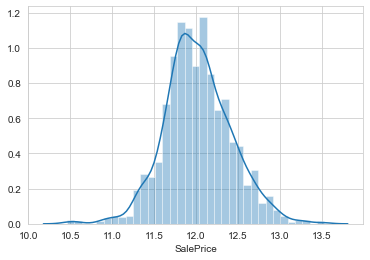

In [23]:
sns.distplot(y)

## Modelling

In [24]:
# Devide the X variables into training data and validation data
threshold = int(.7 * len(X))                                     
X_train = X[:threshold]                             
X_val = X[threshold:]  

In [25]:
# Devide the Y variable into training data and validation data
threshold = int(.7 * len(y))                                     
y_train = y[:threshold]                             
y_val = y[threshold:]  

In [26]:
from sklearn.metrics import mean_absolute_error
def mae (y_pred, y_val):
    errors = abs(y_pred - y_val)
    #mean absolute error (mae)
    val_mae = mean_absolute_error(y_pred, y_val)
    return accuracy
    

### Model1 : Linear Regression

In [27]:
#LInear Regression with Normalising

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

reg = LinearRegression()
reg.fit(X_train , y_train)
y_pred1 = reg.predict(X_val)
val_mae1 = mean_absolute_error(y_pred1, y_val)
print('Mean absolute error: ',val_mae1 )

Mean absolute error:  0.08985846409830983


### Model2 : Ridge Regression

In [28]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas = [1, 0.1, 0.01, 0.0005])
ridge.fit(X_train , y_train)
y_pred2 = ridge.predict(X_val)
val_mae2 = mean_absolute_error(y_pred2, y_val)
print('Mean absolute error: ',val_mae2 )

Mean absolute error:  0.0879216186330177


### Model3 : Lasso Regression

In [29]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas = [1, 0.1, 0.01, 0.0005])
lasso.fit(X_train , y_train)
y_pred3 = lasso.predict(X_val)
val_mae3 = mean_absolute_error(y_pred3, y_val)
print('Mean absolute error: ',val_mae3)

Mean absolute error:  0.08505304085288647


### Model4 : Decission Tree

In [30]:
from sklearn import tree
dtree = tree.DecisionTreeRegressor()
dtree.fit(X_train.astype(int), y_train.astype(int))
y_pred4= dtree.predict(X_val)
val_mae4 = mean_absolute_error(y_pred4, y_val)
print('Mean absolute error: ',val_mae4 )

Mean absolute error:  0.5596822287516128


## Model5: Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor()
rf.fit(X_train.astype(int), y_train.astype(int))
y_pred5= rf.predict(X_val)
val_mae5 = mean_absolute_error(y_pred5, y_val)
print('Mean absolute error: ',val_mae5 )

Mean absolute error:  0.5274847069573348


## Testing

In [32]:
# Testing by using our best model
model_test = LassoCV(alphas = [1, 0.1, 0.01, 0.0005])
model_test.fit(X , y)
y_pred = model_test.predict(X_test)
y_pred = np.exp(y_pred) #Converting log values back to number

In [33]:
#Creating csv file for kaggle submission
df_submission = pd.DataFrame({ "Id": df_test["Id"].values, "SalePrice": y_pred })

df_submission.to_csv("submission_1.csv", index= False)


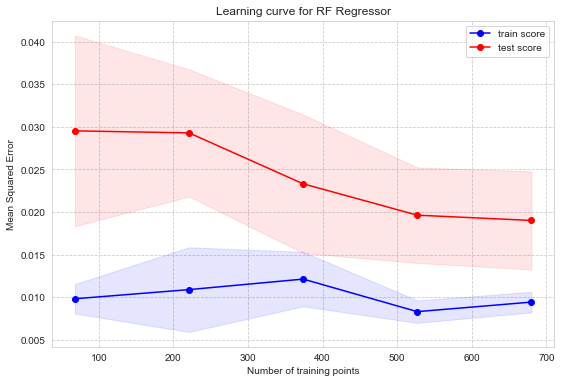

In [36]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_scores = -train_scores
    test_scores = -test_scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red',marker='o')
    plt.fill_between(train_sizes,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel(r'Mean Squared Error')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show() 
    
# Plot the learning curve
lr = LassoCV(alphas = [1, 0.1, 0.01, 0.0005])
plt.figure(figsize=(9,6))
train_sizes, train_scores, test_scores = learning_curve(
                                            lr, X = X_train, y = y_train, 
                                            cv= 3,  scoring='neg_mean_squared_error')

plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for RF Regressor')